In [436]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler






In [437]:
dataMat = pd.read_csv('student/student-mat.csv', sep=';')
dataPor = pd.read_csv('student/student-por.csv', sep=';')

In [438]:
dataMat.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [439]:
dataPor.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [440]:
# Concatenate both dataframes along the rows (axis=0)
data = pd.concat([dataMat, dataPor])

In [441]:
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


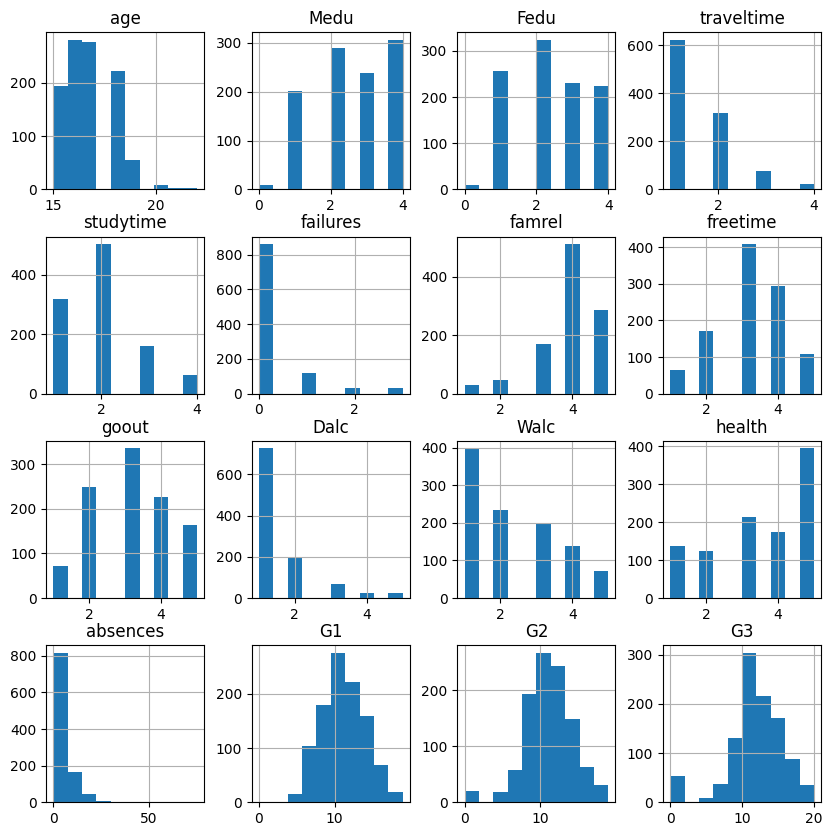

In [442]:
data.hist(figsize = (10,10))
plt.show()

In [443]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [444]:
merged_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
G3_class      0
dtype: int64

In [445]:
# Function to categorize G3 into classes
def categorize_grade(g):
    if g >= 10:
        return 1
    else:
        return 0

# Apply the function to the G3 column to create a new categorical target variable
data['G3_class'] = data['G3'].apply(categorize_grade)

# Check the first few rows to ensure it worked
print(data[['G3', 'G3_class']])


     G3  G3_class
0     6         0
1     6         0
2    10         1
3    15         1
4    10         1
..   ..       ...
644  10         1
645  16         1
646   9         0
647  10         1
648  11         1

[1044 rows x 2 columns]


In [446]:
cleanup_nums = {
    "yes": 1, "no": 0, 
    "F": 1, "M": 0, 
    "GP": 1, "MS": 0, 
    "R": 1, "U": 0, 
    "GT3": 1, "LE3": 0, 
    "A": 1, "T": 0
}

data.replace(cleanup_nums, inplace=True)

data = pd.get_dummies(data, columns=["Mjob", "Fjob", "reason", "guardian"])




C:\Users\Stacy1KelvinNotebook\AppData\Local\Temp\ipykernel_10944\1315077346.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(cleanup_nums, inplace=True)


In [447]:
X = data.drop(columns=['G3', 'G3_class','age','G1','G2'])  # Drop 'G3' and 'G3_class' columns for features
y = data['G3_class']  # Target variable (G3_class)

In [448]:
'''feature_scaling_cols = ['Medu', 'Fedu','traveltime', 'studytime', 'failures',
                            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the selected columns in the training data
data[feature_scaling_cols] = scaler.fit_transform(data[feature_scaling_cols])'''

"feature_scaling_cols = ['Medu', 'Fedu','traveltime', 'studytime', 'failures',\n                            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']\n\n# Initialize the MinMaxScaler\nscaler = MinMaxScaler()\n\n# Apply MinMaxScaler to the selected columns in the training data\ndata[feature_scaling_cols] = scaler.fit_transform(data[feature_scaling_cols])"

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [450]:
X_train.dtypes

school               int64
sex                  int64
address              int64
famsize              int64
Pstatus              int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nursery              int64
higher               int64
internet             int64
romantic             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
Mjob_at_home          bool
Mjob_health           bool
Mjob_other            bool
Mjob_services         bool
Mjob_teacher          bool
Fjob_at_home          bool
Fjob_health           bool
Fjob_other            bool
Fjob_services         bool
Fjob_teacher          bool
reason_course         bool
reason_home           bool
r

In [451]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [452]:
y_pred = clf.predict(X_test)

In [453]:
# Step 5: Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.7420382165605095

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.46      0.47        79
           1       0.82      0.84      0.83       235

    accuracy                           0.74       314
   macro avg       0.65      0.65      0.65       314
weighted avg       0.74      0.74      0.74       314



In [454]:
param_grid = {
    'max_depth': [3, 5, 10, None], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
clf.fit(X_train, y_train)

print("Best Parameters:", clf.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
best_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)


best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Optimized Accuracy:", accuracy_score(y_test, y_pred))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred))


Optimized Accuracy: 0.767515923566879
Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.34      0.43        79
           1       0.80      0.91      0.85       235

    accuracy                           0.77       314
   macro avg       0.68      0.63      0.64       314
weighted avg       0.74      0.77      0.75       314

